# Windpower

**Fundamentals of Data Analysis Project 2020**

*Development of linear regression model for the wind turbine [powerproduction dataset](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/powerproduction.csv) in order to accurately predict the power output of a windturbine for a given wind speed.*  
***

## Background

Wind energy has been used by humans for thousands of years, from the earliest of sailers using wind to propel their boats to ancient farmers using early windmills to grind grain for food production. 

Today in Ireland with the climate emergency & the need for the reduction of dependance on fossil fuels, wind energy development has become an essential means for producing clean renewable electricity, with "wind providing 85% of Ireland’s renewable electricity and 30% of our total electricity demand". [1]

Wind power describes the process in which wind is used to generate mechanical power or electricity.

A wind turbine turns wind energy into electricity using the aerodynamic force from the rotor blades, when wind flows towards a turbine the aerodynamic properties of the rotor blades cause a pressure difference across the two sides of the blade exerting both a lift and drag force on the rotor, similar to how a aeroplane wing works. 
The rotor blade is designed so the lift force experienced is stronger than the drag which will cause the rotor to spin, the spinning rotor of the turbine is then used to drive a genertor for the creation of electricity. 

![Rotor Blade](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Rotor%20Blade.png?raw=true)

**Figure 1** - Rotor Blade Aerodynamic Properties - [alternative-energy-tutorials.com](http://www.alternative-energy-tutorials.com/energy-articles/wind-turbine-blade-design.html)

## Wind Power

Wind turbines work by converting kinetic energy of the wind first into the kinetic energy of the rotation of the turbine rotor blades and then into electrical energy through the turbine generator. 

Derived from Newton's laws of motion the theoretical power converted from the wind into rotational energy in the wind turbine is calculated using the formula [2];

$$ P= \frac{1}{2}\rho A v^3 C_p \hspace{1cm} (1) $$ 

$ P $ = Power $(W)$ 

$ \rho $ = Air Density $(kg/m^3)$

$ A = $ Swept Area $(m^2)$ of the turbine 

$ v = $ Wind Speed $(m/s)$

$ C_p $ = Power Coefficient 

**Note:** The German physicist Albert Betz concluded in 1919 that the theoretical maximum efficiency for any design of wind turbine is 59.3% also known as the Betz limit[2]

In reality, turbines cannot reach the Betz limit, and common efficiencies are in the 35-45% range ($C_p$ = 0.35 - 0.45) [2]

The $C_p$ value is unique to each turbine type, is a function of wind speed and is influenced by various turbine engineering requirements such as strength, durability along with other turbine ineffiencies such as the generator & power transmission. Therefore the amount of wind power converted into actual usable electricity can be as low as 10 - 30% [2].

## Power Curves of Wind Turbines

Power curves of a wind turbines depicts the relationship between wind speed & output power and are used for predicting wind turbines energy output & performace for a given wind forecast. 

Power curves are developed using data from manufacturers’ specifications and actual data collected from the wind farms.

![Wind Power Curve](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Typical%20Power%20Curve.png?raw=true)

**Figure 2** - Typical Wind Power Curve - [www.hindawi.com](https://www.hindawi.com/journals/jen/2016/8519785/)

**Region 1** - Wind speed is not sufficiently high to produce enough force inorder to rotate the turbine rotor blades, therefore the power output of the turbine is zero.

*$ v_{cut-in} $* The wind speed which results in rotation of the rotor blades & begins to drive turbine generator (typically 2-5m/s). The wind turbine may generate some power output at $ v_{cut-in} $ however it
may not be enough to overcome any generator or turbine ineffiencies & therefore no electricity may be produced at this wind speed. 

**Region 2** - The range of wind speed for which the turbine operates & produces electrical power output, note that there is a rapid growth of power produced over this range of wind speeds.

$ v_{rated} $ The optimal operational wind speed for a given wind turbine, note this wind speed may not equate to the max achievable power output but rather the most efficient attainable power output (Rated Power Output) for the wind turbine.

**Region 3** - The constant Rated Power Output is maintained in this wind speed region up untill cut-out wind $ v_{cut-off} $ is reached.

$ v_{cut-off} $ The wind speed at which the turbine is taken out of operation to protect its components from high winds (typically 20–30 m/s).

**Region 4** - Also know furling, for wind speeds at or greater than $ v_{cut-off} $, the turbine is taken out of operation to protect its components from high winds, the turbine produces no power output within this region.

| SMALL TURBINES (0-10m DIAMETER ROTORS) | LARGE TURBINE (160 - 200m DIAMETER ROTORS) | 
|---|---|
| <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Smallest%20Turbines%20-%20Power%20Curve.png?raw=true" width="490"/> | <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Largest%20Windturbine%20-%20Power%20Curve.png?raw=true" width="490"/> |

**Figure 3** - Wind Power Curves For Various Turbine Types - [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves)

From the 2 examples of wind turbine power curves above, it can be seen that the smaller turbines with rotor diameters between 0-10m can have a power output up to 20kW for windspeeds upto 12m/s.

While the largest turbines with rotor diameters between 160 - 200m can produce up to 8000kW for windspeeds upto 12m/s.

## Powerproduction Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# set plot style
plt.style.use("ggplot")

# load powerproduction.csv file into pandas dataframe
df_wind = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [2]:
# Output descriptive statistics of df_wind
df_wind.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The pandas **DataFrame.describe()** function provides a very useful summary of the *powerproduction dataset*.

It can be seen that the dataset consists of 2 columns, speed (wind speed) & power with each column contains 500 datapoints. 

No infomation has been provided regarding the size or type of turbine from which the data was collected or regarding the units of measurement used for the data contained within the dataset.

However by looking at the values within the *powerproduction dataset* and comparing it to the wind turbine power curves found on [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves) the following can be assumped:

- speed (wind speed) - metres per second, $m/s$
- power - kilowatts, $kW$

The summary of the *powerproduction dataset* indicates that the unknown turbine from which the dataset was compiled, has achieved a max powerout of 113kW, this might indicate that the turbine has a rated power output around 100kW. 

From further review of the various wind turbine data & power curves found on [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves) it would appear that the *powerproduction dataset* within this project is comparable to that of a wind turbine with a rotor diameter in the range of 20 to 30m.

**Power Curve - Power vs Speed**

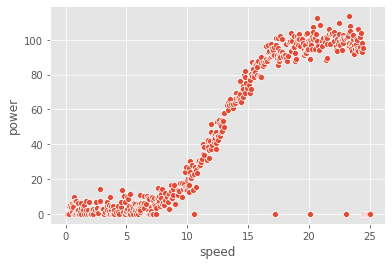

In [3]:
# Seaborn scatterplot of wind speed vs power from df_wind

sns.scatterplot(data=df_wind, x="speed", y="power");

The seaborn scatterplot of 'power' vs 'speed' for the *powerproduction dataset* reflects the very distincive shape of that of a typical wind turbine, refering back to **figure 2** the different regions of the wind turbine powercurve can be clearly differentiated.

The plot also highlights a number of possible outliers or datapoints that don't appear to fit within the dataset.

There are a number of points where the wind speed has increased above 10m/s but the power output for these points has remained at 0, it is a possibility that for these points the wind speed was recorded at a time when the wind turbine was not operable and therefore no corresponding power output was recorded. 
These points will be removed from the dataset, to prevent any possible obscurring of the data analysis or results.

**Cleaning the Dataset**

In [4]:
# Selecting all the outlier datapoints where wind speed > 0 & powerout = 0
df_out = df_wind[(df_wind["speed"]>10) & (df_wind["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

There are 14 number outliers to be removed from the *powerproduction dataset*

In [5]:
# remove the outliers to clean up the dataset
df_clean = df_wind.drop(df_out.index, axis=0)

df_clean.describe()

# Output cleaned dataset as a csv file
df_clean.to_csv("powerproduction_clean.csv", index=False, encoding='utf8')

By removing the outliers, it can be seen that the average speed & max speed of the dataset have been slightly reduced. 

The cleaned up dataset has also been output as "powerproduction_clean.csv" file.

## Wind Power Mathematical Models

A look at some of wind power mathematical formulas & models with a review & comparison against the *powerproduction dataset* values.

**Theoretical Wind Power Formula**

$$ P= \frac{1}{2}\rho A v^3 C_p \hspace{1cm} (1)$$

![swept area](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Wind%20Turbine%20Swept%20Area.PNG?raw=true)

**Figure 4** - Wind Turbine Swept Area - [renewable-solar-energy.blogspot.com](http://renewable-solar-energy.blogspot.com/2011/07/wind-turbine-swept-area.html)

In [6]:
# Using Formula (1) to calculate the Theoretical Wind Power

def P(v, r, cp):
    '''Function to calculate Wind Power
    Input variables: - 
    v = wind speed
    r = wind turbine rotor radius,
    cp = power coefficent''' 

    # Air Density taken as 1.23 kg/m3
    rho = 1.23
    
    # Swept area of turbine πr^2
    A = (r**2) * 3.14
    
    # Power formula (1)
    P = 0.5*rho*A*(v**3)*cp / 1000
    
    return P

In [7]:
# create a NumPy array to provide wind speeds from 0 upto 17.5m/s in 0.5m/s increments
v = np.linspace(0.0, 17.5, 35)

Create a number of Theoretical Wind Power models by varying the power coefficent 'cp' & turbine rotor radius 'r'.

|Turbine|Rotor Diameter 'D' (m)|Rotor Radius 'r' (m)|Power Coefficent 'cp'|
|---|---|---|---|
|Model 1|20|10|0.3|
|Model 2|15|7.5|0.3|
|Model 3|10|5|0.3|
|Model 4|20|10|0.2|
|Model 5|15|7.5|0.2|
|Model 6|10|5|0.2|

In [8]:
# DataFrame with power outputs for turbines with different parameters as listed above 

df_models = pd.DataFrame({"wind speed": v, 
                           "power model 1":P(v, 10, 0.3), 
                           "power model 2":P(v, 7.5, 0.3), 
                           "power model 3":P(v, 5, 0.3),
                           "power model 4":P(v, 10, 0.2),
                           "power model 5":P(v, 7.5, 0.2), 
                           "power model 6":P(v, 5, 0.2),
                         })

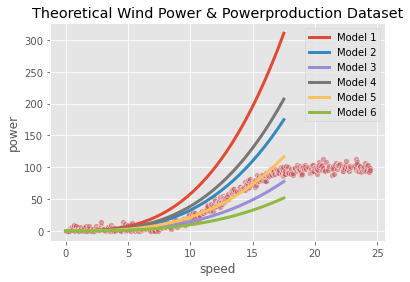

In [9]:
# Comparing the above model plots against the powerproduction dataset 

sns.lineplot(x=df_models["wind speed"], y=df_models["power model 1"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["power model 2"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["power model 3"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["power model 4"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["power model 5"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["power model 6"], linewidth = 3)


plt.legend(labels=['Model 1', 'Model 2', 'Model 3', 'Model 4', 
                   'Model 5', 'Model 6' 
                  ])
plt.title("Theoretical Wind Power & Powerproduction Dataset")

sns.set(rc={'figure.figsize':(15, 10)})
sns.scatterplot(data=df_clean, x="speed", y="power", color='r', alpha=0.5);

Overlaying the theoretical wind power outputs for different turbine parameters against the *powerproduction dataset* provides some interesting insights into & highlights some differences between the theoretical wind power formula & the *powerproduction dataset*.    

1. Reducing the turbine rotor diameter by 5.0m, i.e 20m down to 15m down to 10m can result in approximately halfing the theorectical wind power output each time for a given windspeed.

2. By comparing the different theoretical wind turbine power outputs against the *powerproduction dataset*, it would appear that the theoretical turbine model 5 is the closest approx fit to the dataset. That is a turbine with a diameter of 15m & a power coefficient = 0.2. There are however so many variables that influence a turbines power output & wind power curve, that it would not be possible to say for definite that the powerproduction dataset was in fact produced by a 15m diameter turbine.

**4-Parameter Logistic Function Model**

The 4 parameter logistic function provides a continuous curve relationship between wind speed and generated power [4].

$$ P(u) = a \frac{1 + me^{-u/t}}{1+ ne^{-u/t}} \hspace{1cm} (2)$$

(i) $a = P_r$

(ii) $n = e^{2su_{ip} / (P_r - P_{ip})}$

(iii) $m = (\frac{2P_{ip}}{P_r} - 1) n$

(iv) $\tau = \frac{P_r-P_{ip}}{2s}$

$P_r$, $s$, $u_{ip}$, $P_{ip}$ can be obtained directly from the power curve.

$P_r$ - Rated turbine power output, given by the turbine manufacturer.

($u_{ip}$, $P_{ip}$) - Coordinates of the inflection point, i.e where the gradient of power reaches its maximum.

$s$ -  Slope of the curve

In [52]:
# Calculating parameters based on powerproduction dataset

p_r = 100 # Turbine rated power
s = 12
slope = (20 - 80) / (10 - 15)
print("slope", slope)
u_ip = 15
p_ip = 80

a = p_r
print(a)

n = np.exp((2*s*u_ip)/(p_r-p_ip))
print(n)

m = (((2*p_ip)/p_r)-1)*n
print(m)

tau = ((p_r-p_ip)/2*s)
print(tau)

slope 12.0
100
1.522997974471263e-08
9.13798784682758e-09
-120.0


In [56]:
# Using 4-parameter logistic function (2) to develop wind power curve
def P(u):
    '''4-parameter logistic function,
    Input parameters: - 
    a, m, n & r'''
    a, m, n, tau = 100, 0, 600, 2
    Pu = a * (1.0 + m * np.exp(-u / tau)) / (1.0 + n * np.exp(-u / tau))
    return Pu

In [57]:
df_4p_model = pd.DataFrame({"wind speed": df_clean["speed"], "power":P(df_clean["speed"])})
df_4p_model

,wind speed,power
0,0.000,0.166389
1,0.125,0.177102
2,0.150,0.179325
3,0.225,0.186165
4,0.275,0.190869
...,...,...
485,24.249,99.675558
486,24.299,99.683544
487,24.349,99.691333
488,24.374,99.695155


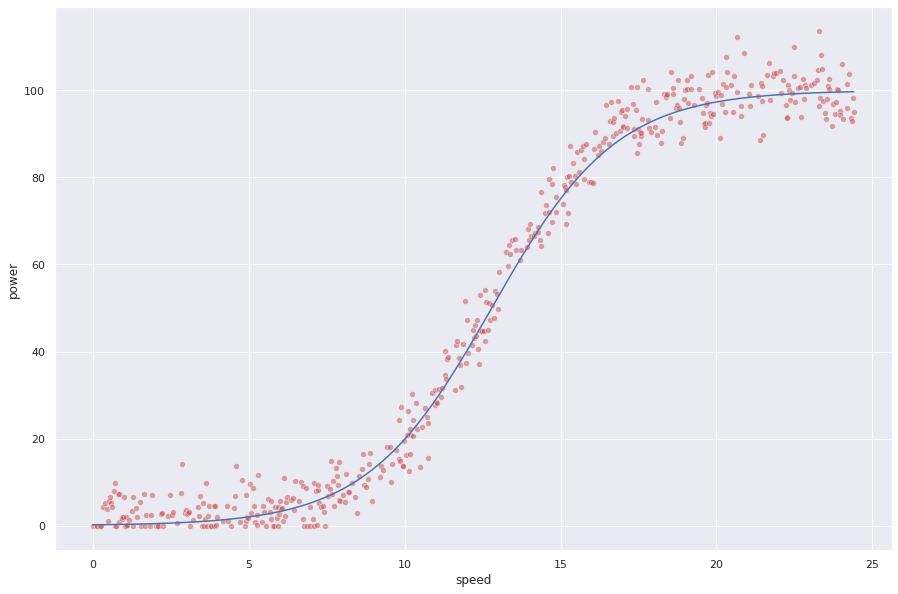

In [58]:
sns.lineplot(x=df_clean["speed"],y=df_4p_model["power"])
sns.scatterplot(data=df_clean, x="speed", y="power", color='r', alpha=0.5);

## References

[1] [seai.ie, Sustainable Energy Authority of Ireland](https://www.seai.ie/technologies/wind-energy/#:~:text=Wind%20energy%20in%20Ireland,of%20renewable%20energy%20in%20Ireland.&text=In%202018%20Wind%20provided%2085,in%20Ireland%20after%20natural%20gas.)

[2] [raeng.org.uk, The Royal Academy of Engineering - Wind Turbine Power Calculations Publication](https://www.raeng.org.uk/publications/other/23-wind-turbine)

[3] [shanelynn.ie, Pandas Dataframe Indexing](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

[4] [Reformulation of parameters of the logistic function applied to power curves of wind turbines, DanielVillanueva & Andrés E.Feijóo, sciencedirect.com](https://www.sciencedirect.com/science/article/pii/S0378779616300992)

[5] [https://www.sciencedirect.com/science/article/pii/S0960148116308989](https://www.sciencedirect.com/science/article/pii/S0960148116308989)